<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-11 11:47:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  32.0MB/s    in 1.1s    

2024-11-11 11:47:35 (32.0 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [8]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()
#df.tail()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [22]:
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
pd.read_sql_query(QUERY,conn)

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


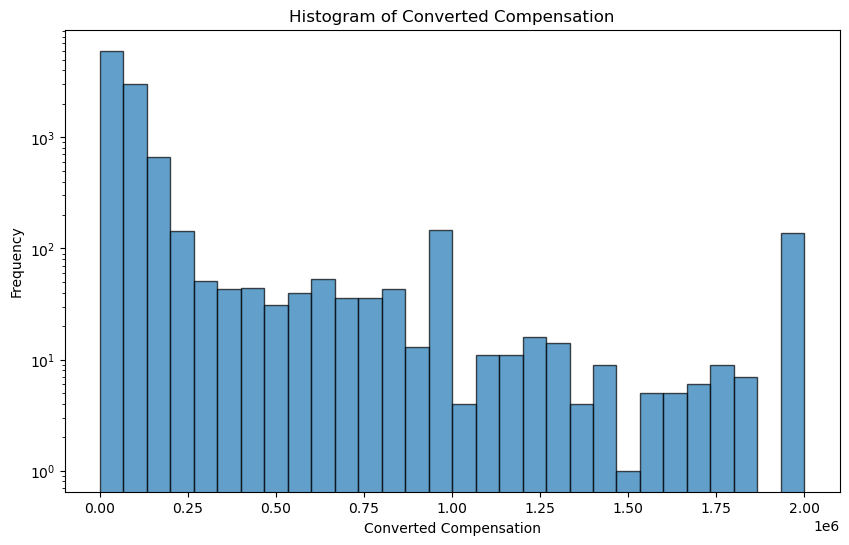

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database 
conn = sqlite3.connect('m4_survey_data.sqlite')

# Query to fetch the ConvertedComp column
query = "SELECT ConvertedComp FROM master"

# Read data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
conn.close()

# Plot the histogram for ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for better visualization if data has a wide range
plt.show()



### Box Plots


Plot a box plot of `Age.`


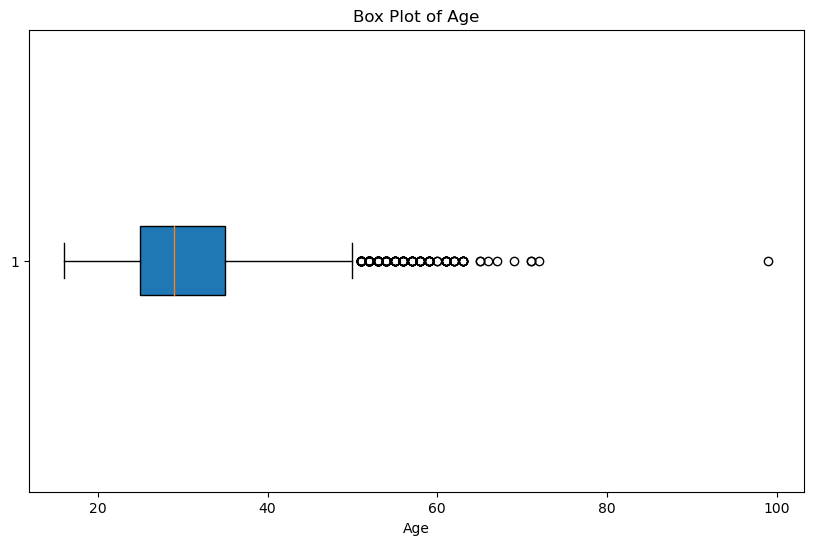

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and fetch data
conn = sqlite3.connect('m4_survey_data.sqlite') 
query = "SELECT Age FROM master"
df = pd.read_sql_query(query, conn)
conn.close()

# Plot the box plot for Age
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


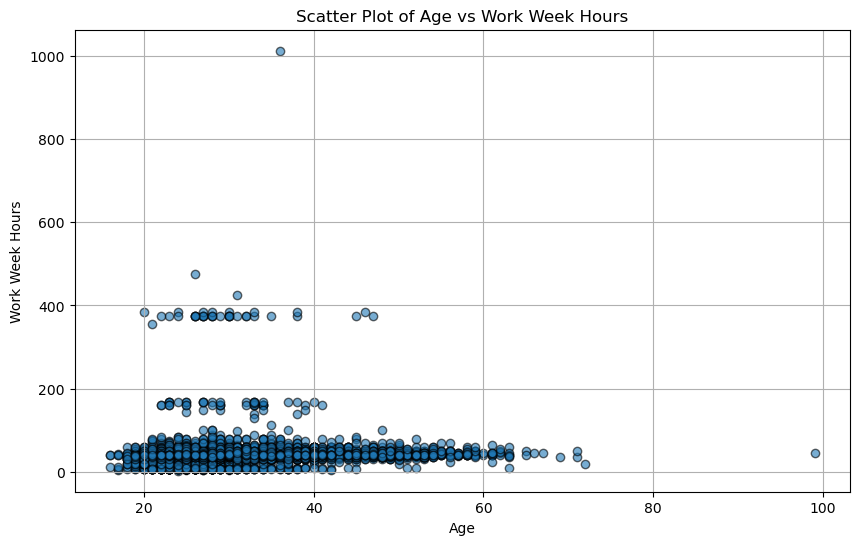

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and fetch data
conn = sqlite3.connect('m4_survey_data.sqlite')  
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql_query(query, conn)
conn.close()

# Drop rows with missing values for the scatter plot
df = df.dropna(subset=['Age', 'WorkWeekHrs'])

# Plot the scatter plot for Age vs WorkWeekHrs
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.6, edgecolors='black')
plt.title('Scatter Plot of Age vs Work Week Hours')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid(True)
plt.show()




### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


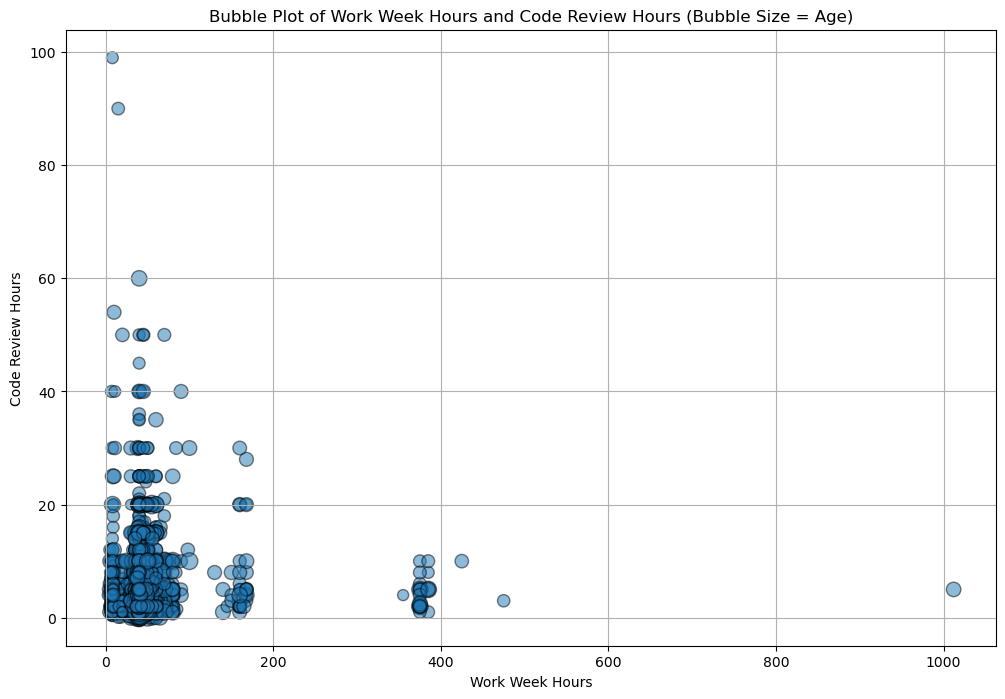

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and fetch data
conn = sqlite3.connect('m4_survey_data.sqlite') 
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"
df = pd.read_sql_query(query, conn)
conn.close()

# Drop rows with missing values for the bubble plot
df = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

# Plot the bubble plot for WorkWeekHrs and CodeRevHrs with Age as bubble size
plt.figure(figsize=(12, 8))
bubble_size = df['Age'] / df['Age'].max() * 300  # Scale bubble size for better visualization
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=bubble_size, alpha=0.5, edgecolors='black')

plt.title('Bubble Plot of Work Week Hours and Code Review Hours (Bubble Size = Age)')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.grid(True)
plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


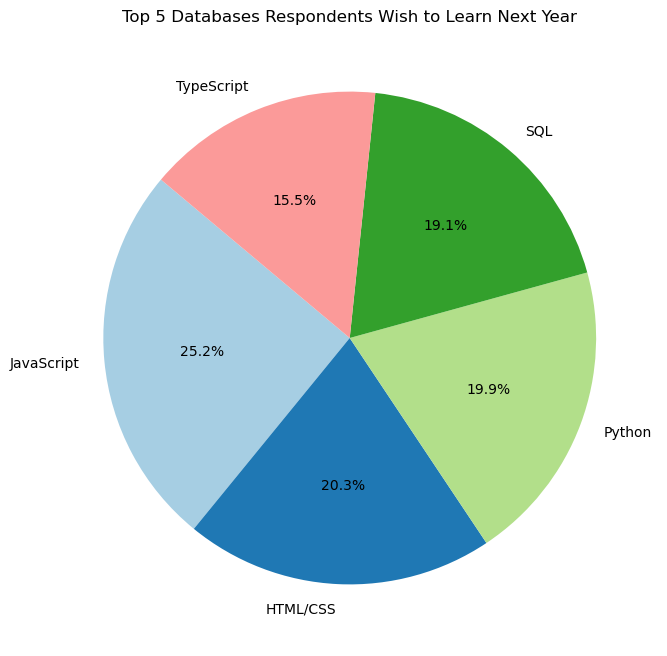

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and fetch data
conn = sqlite3.connect('m4_survey_data.sqlite')  
query = "SELECT LanguageDesireNextYear FROM LanguageDesireNextYear"
df = pd.read_sql_query(query, conn)
conn.close()

# Count the frequency of each database and get the top 5
top_databases = df['LanguageDesireNextYear'].value_counts().head(5)

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_databases,
    labels=top_databases.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()




### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


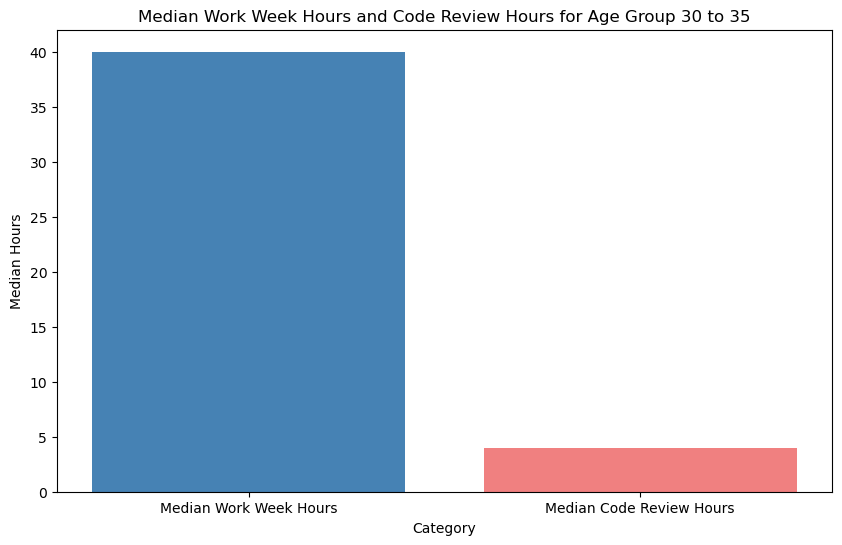

In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and fetch data
conn = sqlite3.connect('m4_survey_data.sqlite')  
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df = pd.read_sql_query(query, conn)
conn.close()

# Filter data for age group 30 to 35
age_filtered_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate median WorkWeekHrs and CodeRevHrs
median_workweekhrs = age_filtered_df['WorkWeekHrs'].median()
median_coderevhrs = age_filtered_df['CodeRevHrs'].median()

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Category': ['Median Work Week Hours', 'Median Code Review Hours'],
    'Median Values': [median_workweekhrs, median_coderevhrs]
})

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['Category'], data['Median Values'], color=['steelblue', 'lightcoral'])

plt.title('Median Work Week Hours and Code Review Hours for Age Group 30 to 35')
plt.ylabel('Median Hours')
plt.xlabel('Category')
plt.show()




## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


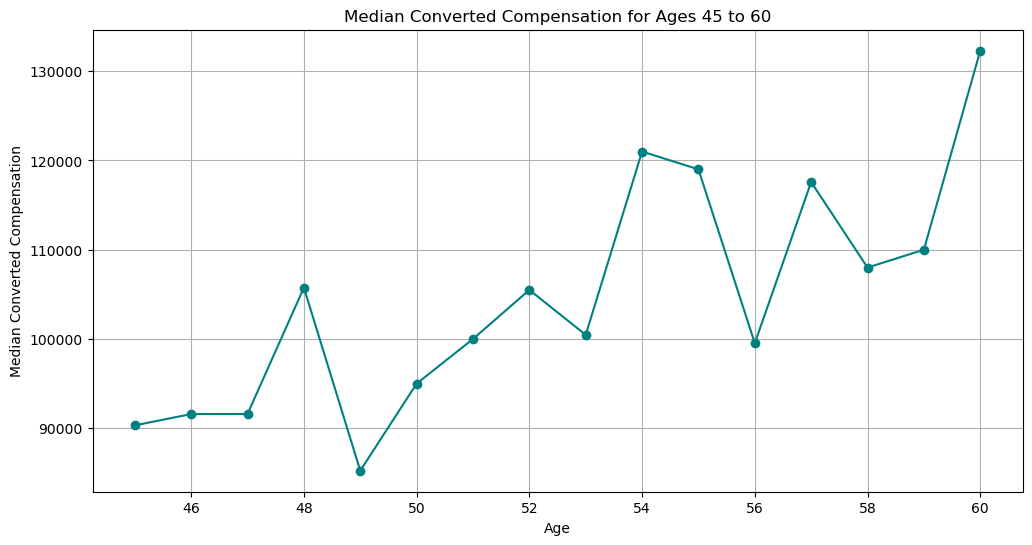

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and fetch data
conn = sqlite3.connect('m4_survey_data.sqlite')  
query = "SELECT Age, ConvertedComp FROM master"
df = pd.read_sql_query(query, conn)
#conn.close()

# Filter data for age range 45 to 60
age_filtered_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Group by Age and calculate the median ConvertedComp for each age
median_comp_by_age = age_filtered_df.groupby('Age')['ConvertedComp'].median().dropna()

# Plot the median ConvertedComp for all ages from 45 to 60
plt.figure(figsize=(12, 6))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker='o', linestyle='-', color='teal')

plt.title('Median Converted Compensation for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)
plt.show()




### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [26]:
# Count the frequency of each unique MainBranch value
mainbranch_counts = df['MainBranch'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Distribution of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.show()



KeyError: 'MainBranch'

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
